In [1]:
import sys
sys.argv = ['23']

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import config.config as cc
import itertools
import plotly.express as px 
from scipy import stats
from copy import deepcopy
from sklearn.model_selection import GroupShuffleSplit
from sklearn.datasets import fetch_openml
warnings.filterwarnings('ignore')

from _1_DataPrep import SpecificPrep
from Functions import metrics
from sklearn.datasets import fetch_openml
import pandas as pd
import joblib

%load_ext autoreload
%autoreload 2

Has EI


In [2]:
df = fetch_openml(data_id=41214, as_frame=True).data

In [ ]:
# Issue: Exposure often not one year
df.groupby(df['Exposure'] == 1).count()

In [3]:
# Issue: Many non-unique PolicyIDs
df_freq = df.iloc[df.drop(['IDpol','Exposure','ClaimNb'], axis=1).drop_duplicates().index]
df_freq = df_freq.reset_index(drop=True)
df_freq['GroupID'] = df_freq.index+1
df_freq = pd.merge(df,df_freq, how='left')
df_freq['GroupID'] = df_freq['GroupID'].fillna(method='ffill')

In [32]:
# Distributions

In [42]:
df_freq = df.copy(deep=True)
df_freq['ClaimNb'] = df_freq['ClaimNb'].apply(lambda x: 4 if x > 4 else x)
df_freq['Area'] = df_freq['Area'].apply(lambda x: ord(x) - 64)
df_freq['VehAge'] = df_freq['VehAge'].apply(lambda x: 20 if x > 20 else x)
df_freq['DrivAge'] = df_freq['DrivAge'].apply(lambda x: 90 if x > 90 else x)
df_freq['BonusMalus'] = df_freq['BonusMalus'].apply(lambda x: 150 if x > 150 else int(x))
df_freq['Density'] = df_freq['Density'].apply(lambda x: round(math.log(x), 2))
df_freq['Exposure'] = df_freq['Exposure'].apply(lambda x: 1. if x > 1 else x)
df_freq['VehPower'] = df_freq['VehPower'].apply(lambda x: 9 if x > 9 else x)

In [48]:
for col in df:
    print(col)

IDpol
ClaimNb
Exposure
Area
VehPower
VehAge
DrivAge
BonusMalus
VehBrand
VehGas
Density
Region


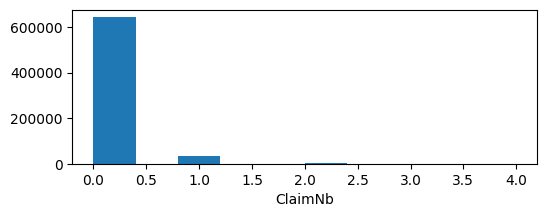

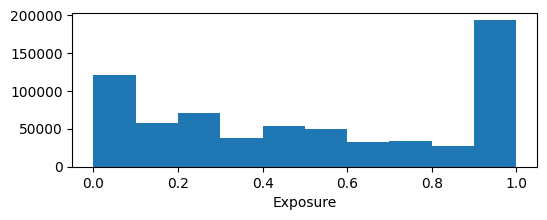

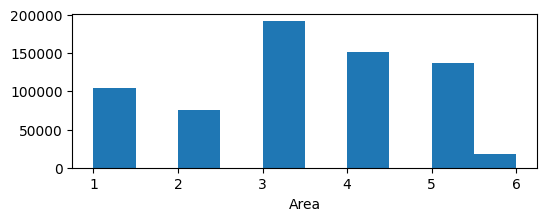

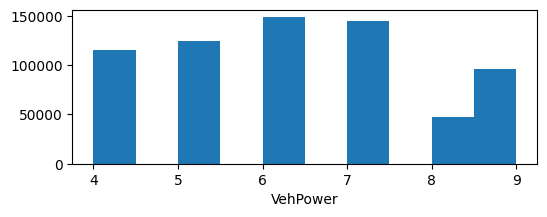

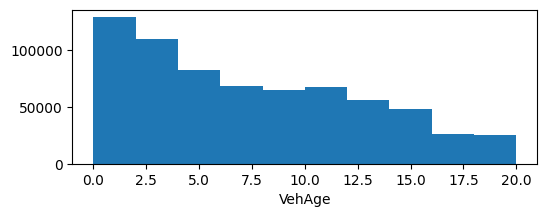

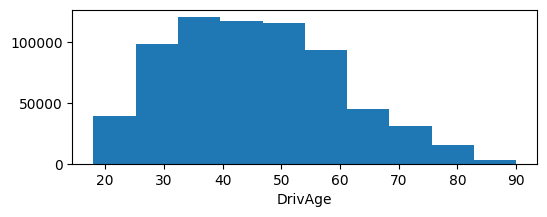

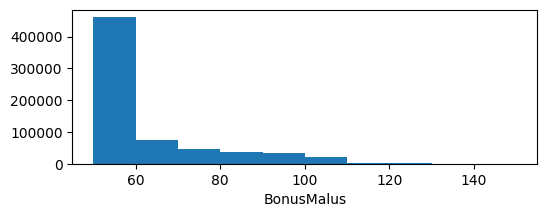

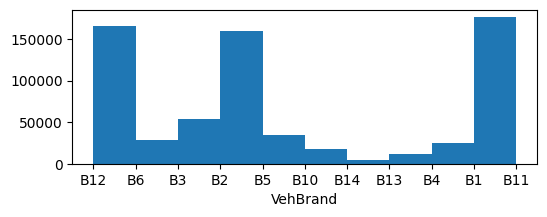

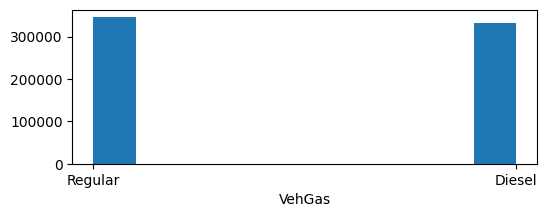

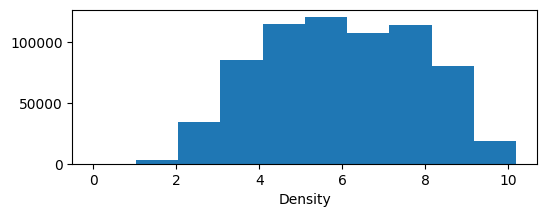

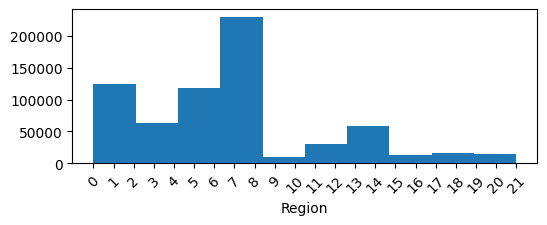

In [119]:
df_freq['Exposure'] = df_freq['Exposure'].round(2)
for colname in ['ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region']:
    fig = plt.figure(figsize=(6,2))
    ax = fig.gca()
    ax = df_freq[colname].hist(grid=False, ax=ax)
    ax.set_xlabel(colname)
    if colname == 'Region':
        ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    plt.show()
    

[Text(-1000000.0, 0, '-1000000.0'),
 Text(0.0, 0, '0.0'),
 Text(1000000.0, 0, '1000000.0'),
 Text(2000000.0, 0, '2000000.0'),
 Text(3000000.0, 0, '3000000.0'),
 Text(4000000.0, 0, '4000000.0'),
 Text(5000000.0, 0, '5000000.0'),
 Text(6000000.0, 0, '6000000.0'),
 Text(7000000.0, 0, '7000000.0')]

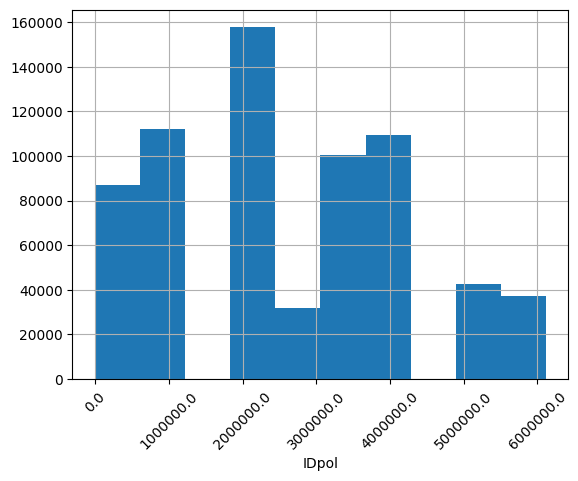

In [101]:
ax = df_freq[colname].hist()
ax.set_xlabel(colname)
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

<Axes: ylabel='Density'>

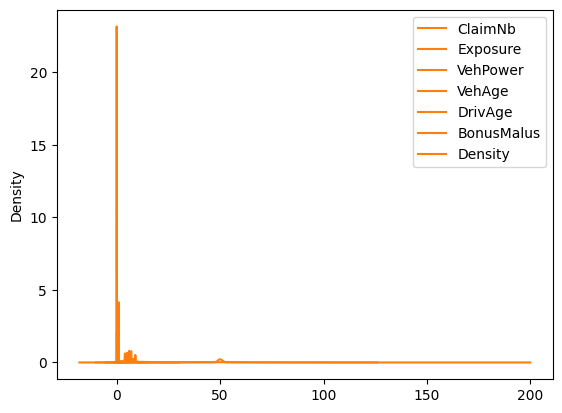

In [47]:
# Distributions of variables
df_freq.drop('IDpol', axis=1).hist(bins= 10, layout=(7, 1), figsize=(4,20))

In [ ]:
df2 = df.groupby(list(df.drop(['IDpol', 'ClaimNb', 'Exposure'], axis=1).columns)).count()

In [ ]:
df2.groupby('IDpol').count()

In [7]:
plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
plt.subplot(1, 3, 1)
sns.histplot(df_freq, x='Exposure')
plt.subplot(1, 3, 2)
sns.boxplot(y="Exposure", data=df_freq)
plt.subplot(1, 3, 3)
sns.histplot(df_freq, x='ClaimNb')
df_freq['ExposureGrp'] = df_freq['Exposure'].apply(lambda x: 'Full Year' if x == 1 else 'not Full Year')
df_freq[['Exposure', 'ExposureGrp']].groupby('ExposureGrp').count().apply(lambda x: 100 * x / float(x.sum()))

12